In [41]:
import pandas as pd
import numpy as np

#Loading the Data

In [42]:
df = pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [43]:
df.shape

(12294, 7)

#Exploratory Data Analysis

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [46]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [47]:
df['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [48]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [49]:
df['genre'].fillna('Unknown', inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)

<ipython-input-49-d46e512c6691>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Unknown', inplace=True)
<ipython-input-49-d46e512c6691>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [50]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


<Axes: ylabel='type'>

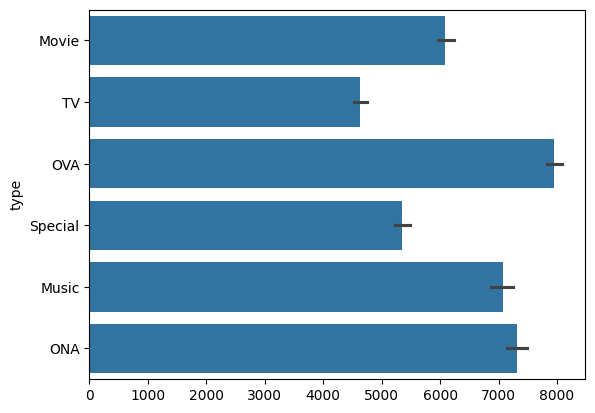

In [51]:
sns.barplot(df['type'])

In [52]:
type_rate = df.groupby('type')['rating'].mean().sort_values(ascending=False)
type_rate

,rating
type,
TV,6.886453
Special,6.523353
OVA,6.375996
Movie,6.321443
ONA,5.652120
Music,5.588996


**We infer that the average rating of anime type is around 6 to all types.**

<Axes: xlabel='type', ylabel='rating'>

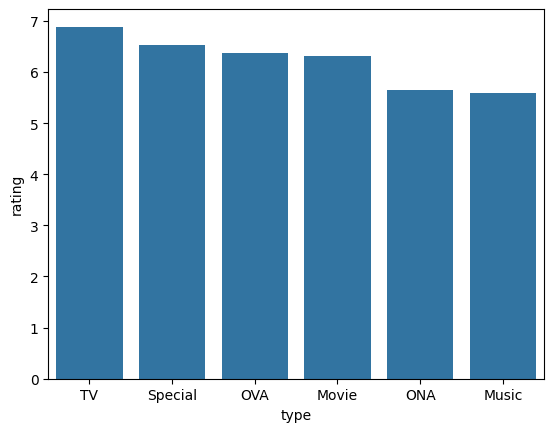

In [53]:
sns.barplot(type_rate)

In [54]:
high_rate = df.groupby('name')['rating'].mean().sort_values(ascending=False)
high_rate.head(10)

,rating
name,
Taka no Tsume 8: Yoshida-kun no X-Files,10.00
Spoon-hime no Swing Kitchen,9.60
Mogura no Motoro,9.50
Kimi no Na wa.,9.37
Kahei no Umi,9.33
Fullmetal Alchemist: Brotherhood,9.26
Gintama°,9.25
Yakusoku: Africa Mizu to Midori,9.25
Steins;Gate,9.17


**Here we see the top 10 rated animes.**

<Axes: >

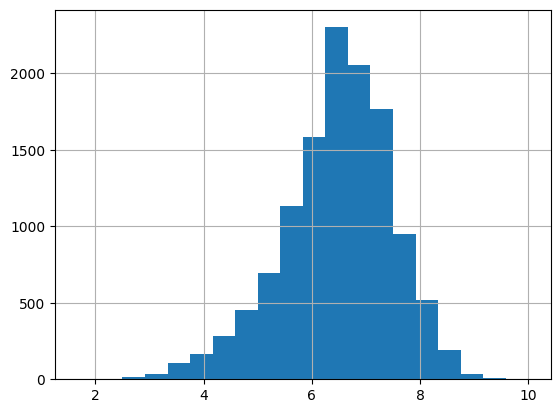

In [70]:
high_rate.hist(bins=20)

#Data preprocessing

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
scaler = MinMaxScaler()
df[['rating','members']] = scaler.fit_transform(df[['rating','members']])

In [57]:
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(df['genre'])

In [58]:
combined_features = np.hstack((genre_matrix.toarray(), df[['rating', 'members']].values))

In [59]:
combined_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.24369748e-01, 1.97872202e-01],
       [2.94649234e-01, 3.17606646e-01, 0.00000000e+00, ...,
        0.00000000e+00, 9.11164466e-01, 7.82770102e-01],
       [2.50631444e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.09963986e-01, 1.12689267e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.85354142e-01, 2.11063682e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.97358944e-01, 1.67667411e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.54981993e-01, 1.35120208e-04]])

#Recommendation System

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
cosine_sim = cosine_similarity(combined_features, combined_features)

In [62]:
def get_recommendations(anime_name, cosine_sim=cosine_sim):
  idx = df[df['name'] == anime_name].index[0]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  anime_indices = [i[0] for i in sim_scores]
  return df['name'].iloc[anime_indices]

In [71]:
recommended_anime = get_recommendations('Naruto')
print(recommended_anime)

615                                    Naruto: Shippuuden
206                                         Dragon Ball Z
346                                           Dragon Ball
1472          Naruto: Shippuuden Movie 4 - The Lost Tower
1573    Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...
486                              Boruto: Naruto the Movie
1343                                          Naruto x UT
2997    Naruto Soyokazeden Movie: Naruto to Mashin to ...
1103    Boruto: Naruto the Movie - Naruto ga Hokage ni...
588                                       Dragon Ball Kai
Name: name, dtype: object


**Here we can see the recommended animes for the Naruto.**

In [72]:
ani2 = get_recommendations('One Piece')
print(ani2)

241      One Piece: Episode of Nami - Koukaishi no Nami...
86                                      Shingeki no Kyojin
231      One Piece: Episode of Merry - Mou Hitori no Na...
896      One Piece: Episode of Sabo - 3 Kyoudai no Kizu...
6                                   Hunter x Hunter (2011)
717                                 Shingeki no Kyojin OVA
10899                          Shingeki no Kyojin Season 2
352                 One Piece Film: Strong World Episode 0
941                  One Piece Movie 4: Dead End no Bouken
2492                                     One Piece Movie 1
Name: name, dtype: object


**And recommended animes for One Piece.**

#Evaluation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [75]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [76]:
actual_anime = [1, 0, 1, 1, 0]
recommended_anime1  = [1, 1, 1, 0, 1]

In [77]:
precision = precision_score(actual_anime, recommended_anime1, average='macro')
recall = recall_score(actual_anime, recommended_anime1, average='macro')
f1 = f1_score(actual_anime, recommended_anime1, average='macro')

In [78]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1_score: {f1}")

Precision: 0.25
Recall: 0.3333333333333333
f1_score: 0.2857142857142857


**1.Difference betweeen user-based and item-based collaborative filtering.**

-> **User-based collaborative filtering**: It is a type of recommendation system that makes predictions for a user based on the preferences of similar users. It works by finding users with similar tastes and recommending items they liked to the target user.

-> **Item-based collaborative filtering:** It recommends items to a user based on the preferences for similar items. It works by identifying items that are similar to the ones a user has liked in the past and recommending them to the user.

**2.Collaborative filtering**

Collaborative filtering recommendation systems recommend items to users based on the preferences and behaviors of other similar users. This type of system analyzes the user’s historical data, as well as the data of other users with similar preferences, and recommends items that similar users have liked or interacted with before. For example, if two users have similar purchase histories, a collaborative filtering recommendation system might recommend items that one user has purchased to the other user.